In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model

%matplotlib inline

### Create Non Linear Synthetic DataSet

In [2]:
np.random.seed(1)
m = 400 # number of examples
N = int(m/2) # number of points per class
D = 2 # dimensionality
X = np.zeros((m,D)) # data matrix where each row is a single example
Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
a = 4 # maximum ray of the flower

for j in range(2):
    ix = range(N*j,N*(j+1))
    t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
    r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    Y[ix] = j
    
X = X.T
Y = Y.T

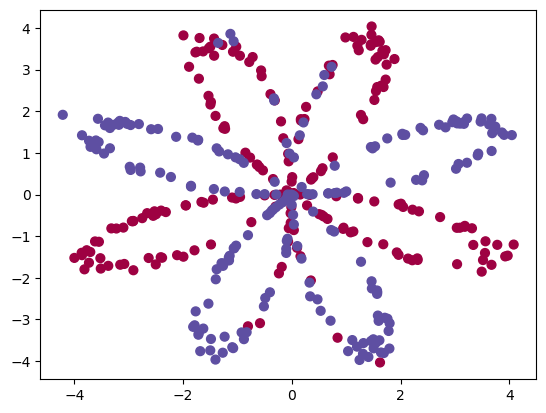

In [3]:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [4]:
print(f"Shape of X is: {X.shape}")
print(f"Shape of Y is: {Y.shape}")
print(f"Number of examples are: {X.shape[1]}")

Shape of X is: (2, 400)
Shape of Y is: (1, 400)
Number of examples are: 400


### Test performance of Linear model

In [5]:
log_reg = sklearn.linear_model.LogisticRegressionCV()

log_reg.fit(X.T, Y.T)

/home/alifseen/miniconda3/envs/ml3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV()

In [6]:
LR_predictions = log_reg.predict(X.T)

In [7]:
print ('Accuracy of logistic regression: %d' % (log_reg.score(X.T, Y.T)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

Accuracy of logistic regression: 47% (percentage of correctly labelled datapoints)


### Nerual Network Blocks
1. Define the neural network structure ( # of input units, # of hidden units, etc). 
2. Initialize the model's parameters
3. Loop: - Implement forward propagation - Compute loss - Implement backward propagation to get the gradients - Update parameters (gradient descent)

In [8]:
def layer_sizes(X,Y, neurons=4):
    n_x = X.shape[0]
    n_y = Y.shape[0]
    n_h = neurons
    return n_x, n_h, n_y

In [9]:
(n_x, n_h, n_y) = layer_sizes(X, Y)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 2
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 1


In [10]:
def initialize_parameters(input_layer, neurons, ouput_layer):
    W1 = np.random.randn(neurons, input_layer) *0.01
    W2 = np.random.randn(ouput_layer, neurons) *0.01
    b1 = np.zeros((neurons, 1))
    b2 = np.zeros((ouput_layer, 1))
    
    params = {
        "W1":W1,
        "b1":b1,
        "W2":W2,
        "b2":b2,
    }

    return params

In [11]:
# np.random.seed(2)
# parameters = initialize_parameters(n_x, n_h, n_y)

# print("W1 = " + str(parameters["W1"]))
# print("b1 = " + str(parameters["b1"]))
# print("W2 = " + str(parameters["W2"]))
# print("b2 = " + str(parameters["b2"]))

In [12]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

def linear(x, w, b):
    z = w.dot(x) + b
    return z

In [24]:
def forward_propagation(X, parameters):
    W1, W2, b1, b2 = parameters['W1'], parameters['W2'], parameters['b1'], parameters['b2']

    Z1 = linear(X, W1, b1)
    A1 = np.tanh(Z1)
    Z2 = linear(A1, W2, b2)
    A2 = sigmoid(Z2)

    assert(A2.shape == (1, X.shape[1]))
    cache = {
        "Z1":Z1,
        "A1":A1,
        "Z2":Z2,
        "A2":A2,
    }

    return A2, cache

In [25]:
# A2, cache = forward_propagation(X, parameters)

In [26]:
def compute_cost(A2, Y):
    m = Y.shape[1]
    j = -(1/m) * np.sum((Y*np.log(A2))+((1-Y)*np.log(1-A2)))
    return float(np.squeeze(j))

In [16]:
# cost = compute_cost(A2, Y)
# print("cost = " + str(cost))


In [17]:
def backward_propagation(parameters, cache, X, Y):
    Z1, A1, Z2, A2 = cache["Z1"], cache["A1"], cache["Z2"], cache["A2"]
    W1, W2, b1, b2 = parameters["W1"], parameters["W2"], parameters["b1"], parameters["b2"]
    m = X.shape[1]

    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis = 1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (1-np.square(A1))
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {
        "dW1":dW1,
        "dW2":dW2,
        "db1":db1,
        "db2":db2,
    }

    return grads

In [18]:
# grads = backward_propagation(parameters, cache, X, Y)

# print ("dW1 = "+ str(grads["dW1"]))
# print ("db1 = "+ str(grads["db1"]))
# print ("dW2 = "+ str(grads["dW2"]))
# print ("db2 = "+ str(grads["db2"]))

In [19]:
def update_parameters(parameters, grads, lr = 1.2):
    W1, b1, W2, b2 = copy.deepcopy(parameters['W1']), copy.deepcopy(parameters['b1']), copy.deepcopy(parameters['W2']), copy.deepcopy(parameters['b2'])
    dW1, db1, dW2, db2 = grads["dW1"],grads["db1"],grads["dW2"],grads["db2"]

    W1 = W1 - (lr * dW1)
    W2 = W2 - (lr * dW2)
    b1 = b1 - (lr * db1)
    b2 = b2 - (lr * db2)

    parameters = {
        "W1":W1,
        "b1":b1,
        "W2":W2,
        "b2":b2,
    }

    return parameters

In [20]:
def nn_model(X, Y, neurons, iters=10000, lr = 1.2, print_cost=False):
    np.random.seed(3)
    n_x, n_h, n_y = layer_sizes(X, Y, neurons)
    parameters = initialize_parameters(n_x, n_h, n_y)

    for i in range(iters):
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads, lr = lr)

        if print_cost and i%1000 == 0:
            print(f"Iteration: {i}, Cost: {cost}")
    return parameters

In [21]:
def predict(parameters, X):
    A2, cache = forward_propagation(X, parameters)
    prediction = (A2 > 0.5).astype(int)
    return prediction

In [22]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

Iteration: 0, Cost: 0.6931621661402946
Iteration: 1000, Cost: 0.25862506828690457
Iteration: 2000, Cost: 0.23933351654583143
Iteration: 3000, Cost: 0.23080163442975746
Iteration: 4000, Cost: 0.2255280270817635
Iteration: 5000, Cost: 0.221844675950227
Iteration: 6000, Cost: 0.21909438354878746
Iteration: 7000, Cost: 0.22063470690621823
Iteration: 8000, Cost: 0.21941714613312527
Iteration: 9000, Cost: 0.2185278158979793


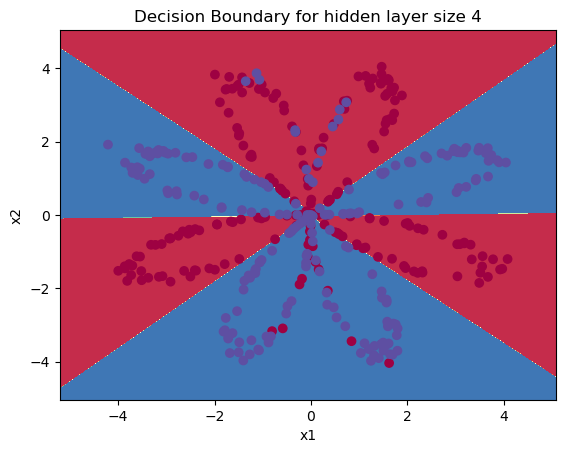

In [27]:
parameters = nn_model(X, Y, neurons=4, iters=10000, print_cost=True)

plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))
plt.show()

In [28]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')

Accuracy: 90%


/tmp/ipykernel_5082/1304927518.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')


/tmp/ipykernel_5082/858588603.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  accuracy = float((np.dot(Y,predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size)*100)


Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 91.25 %


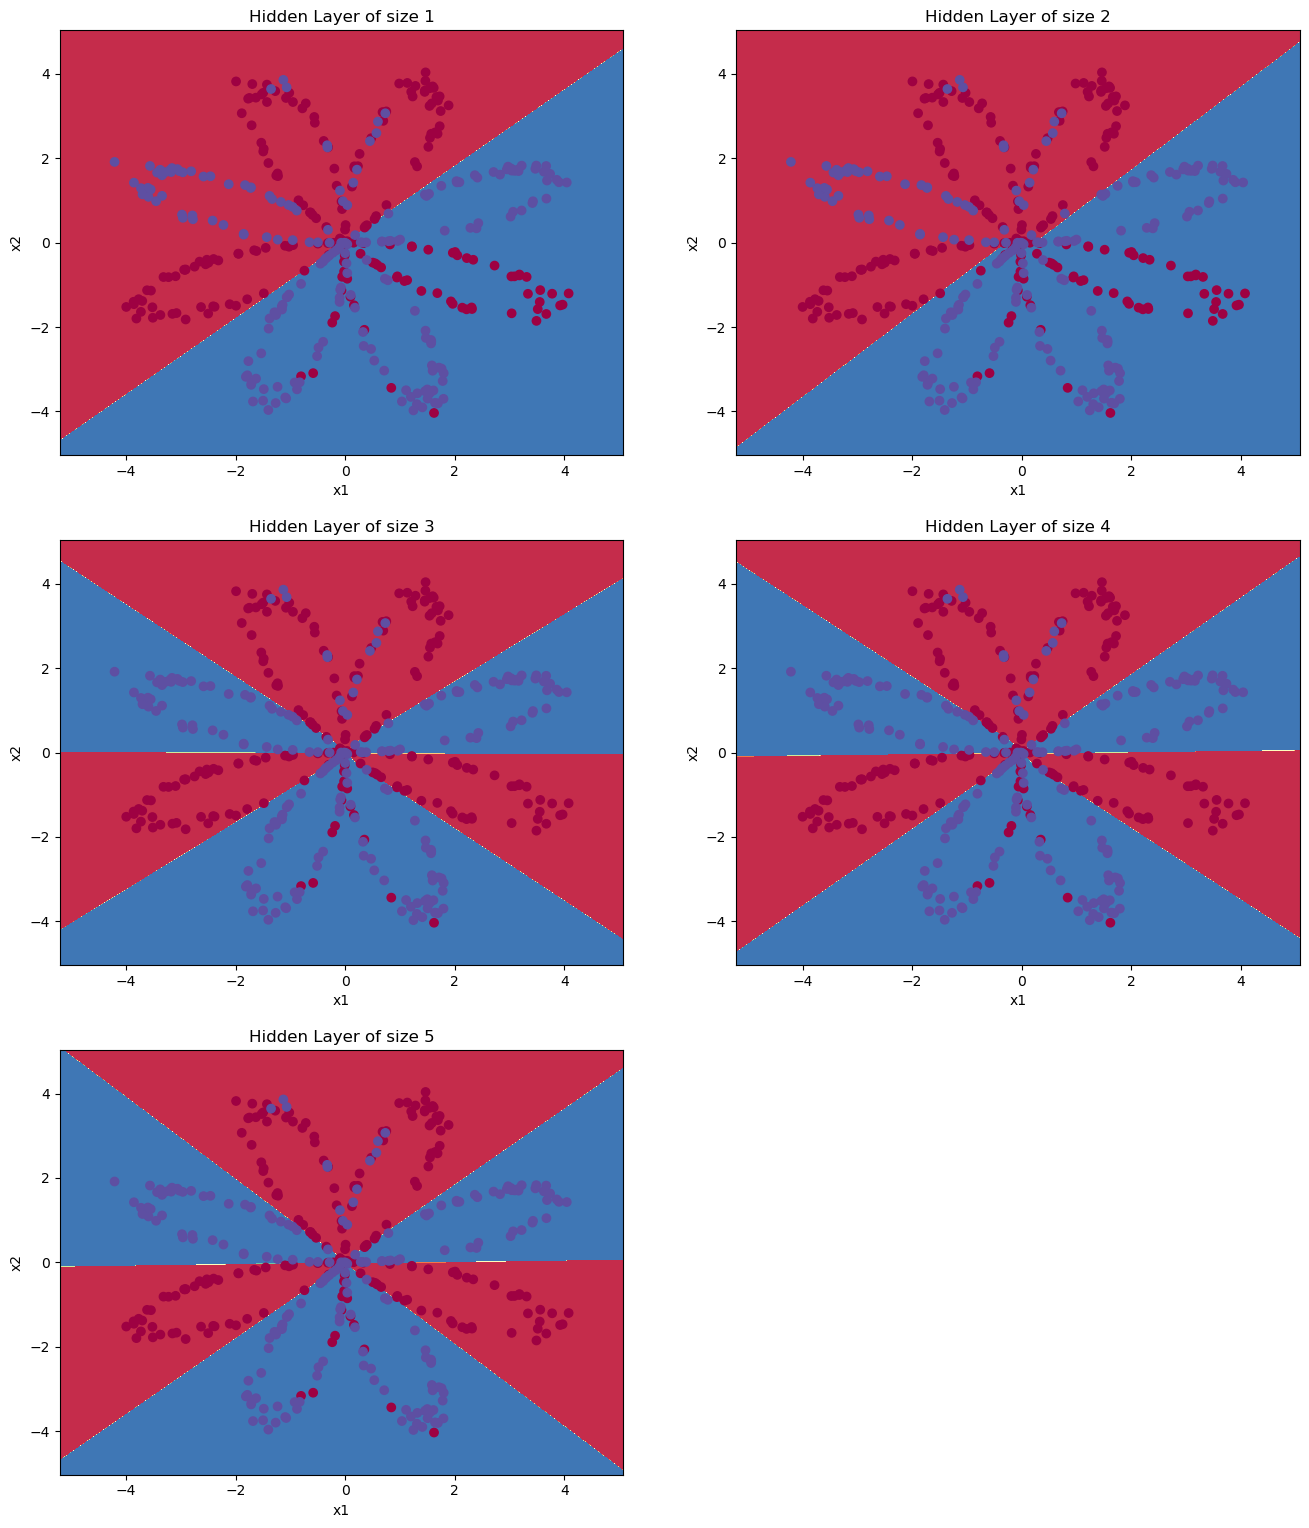

In [29]:
# This may take about 2 minutes to run

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5]

# you can try with different hidden layer sizes
# but make sure before you submit the assignment it is set as "hidden_layer_sizes = [1, 2, 3, 4, 5]"
# hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]

for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, iters = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

plt.show()

In [30]:
def load_extra_datasets():  
    N = 200
    noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
    blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    no_structure = np.random.rand(N, 2), np.random.rand(N, 2)
    
    return noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure

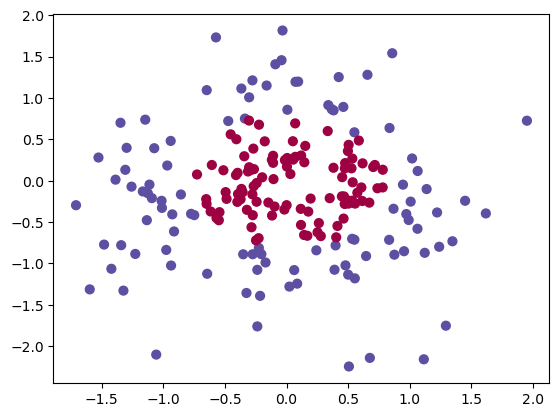

In [31]:
# Datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

### START CODE HERE ### (choose your dataset)
dataset = "gaussian_quantiles"
### END CODE HERE ###

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);
plt.show()

Iteration: 0, Cost: 0.6931513568582685
Iteration: 1000, Cost: 0.08704422321773868
Iteration: 2000, Cost: 0.07127720522018471
Iteration: 3000, Cost: 0.050114134159331025
Iteration: 4000, Cost: 0.04729709137185652
Iteration: 5000, Cost: 0.04238087873837358
Iteration: 6000, Cost: 0.04147988973454538
Iteration: 7000, Cost: 0.06572083504101642
Iteration: 8000, Cost: 0.040144249561985305
Iteration: 9000, Cost: 0.037149382048327365


/tmp/ipykernel_5082/2633618638.py:3: RuntimeWarning: divide by zero encountered in log
  j = -(1/m) * np.sum((Y*np.log(A2))+((1-Y)*np.log(1-A2)))
/tmp/ipykernel_5082/2633618638.py:3: RuntimeWarning: invalid value encountered in multiply
  j = -(1/m) * np.sum((Y*np.log(A2))+((1-Y)*np.log(1-A2)))


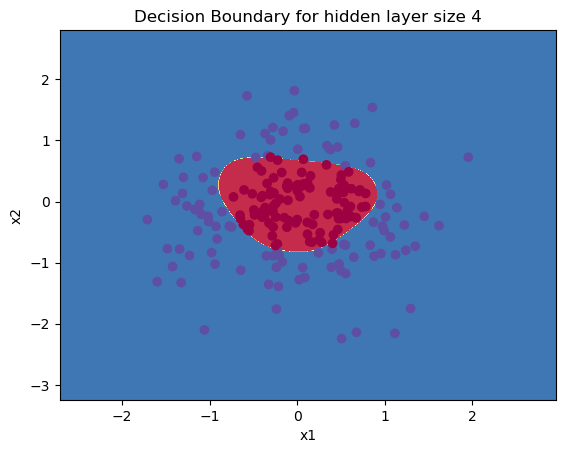

In [32]:
parameters = nn_model(X, Y, neurons=4, iters=10000, print_cost=True)

plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))
plt.show()